# Data Exploration and Introduction to Hypothesis Testing

Now, we'll go through some of the basic statistical concepts and start talking about hypothesis testing and continue next week.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
from os.path import join

In [3]:
d_path = "./data"
filename = "nba_players_modified.csv"

df = pd.read_csv(join(d_path, filename))

In [4]:
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1980-01-01,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
1,1980-01-01,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
2,1980-01-01,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
3,1980-01-01,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
4,1980-01-01,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0


In [5]:
df["Year"] = pd.to_datetime(df["Year"])  # convert back to datetime

###  Descriptive Statistics

**Measures of central tendency**

___Mean:___ The mean is a descriptive statistic that looks at the average value of a data set. In the case of the mean, the "middle" of the data set refers to this typical value.

$\mu = \frac{\sum_i^N X_i}{N}$

___Median:___ The median attempts to define a typical value in the data set as well. It is the value in the middle when the data set is sorted.

___Mode:___ Most frequent value in the data set.

**Measures of spread**

___Variance:___ Measures how far each number in the set is from the mean.

$\sigma^2 = \frac{\sum_{i=1}^N (x_i - \mu)^2 }{N}$


___Standard Deviation:___ The square root of variance. The main difference from variance is that standard deviation returns the values in the originl units.

$\sigma = \sqrt{\frac{\sum_{i=1}^N (x_i - \mu)^2 }{N}}$

In [6]:
df.describe()  # generates descriptive statistics that summarize 
               # the central tendency, dispersion and shape of a dataset’s distribution
               # excluding NaN values

,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,18896.000000,18896.000000,18204.000000,18896.000000,18891.000000,18820.000000,18896.000000,18808.000000,18891.000000,18891.000000,...,18896.000000,18896.000000,18896.000000,18896.000000,18896.000000,18896.000000,18896.000000,18896.000000,18896.000000,18896.000000
mean,26.833139,49.619285,23.589815,1161.118544,12.391107,0.503826,0.157922,0.319727,6.156471,13.748600,...,0.693154,60.112352,143.810066,203.922417,110.455387,38.762436,24.197343,72.492221,108.216025,485.255610
std,3.996432,26.695027,28.633833,923.889702,6.203806,0.094577,0.187463,0.230647,4.960637,6.609785,...,0.201179,65.955994,142.178753,202.530358,137.296035,37.837936,36.494901,66.575427,80.907365,478.944971
min,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,26.000000,0.000000,311.750000,9.700000,0.473000,0.005000,0.197000,2.500000,8.900000,...,0.641000,12.000000,32.000000,46.000000,17.000000,9.000000,3.000000,17.000000,35.000000,94.000000
50%,26.000000,55.000000,8.000000,984.000000,12.600000,0.516000,0.063000,0.287000,5.300000,12.800000,...,0.742000,36.000000,104.000000,145.000000,61.000000,28.000000,11.000000,54.000000,98.000000,337.000000
75%,30.000000,75.000000,45.000000,1892.000000,15.600000,0.551000,0.286250,0.395000,9.000000,18.100000,...,0.810000,88.000000,209.000000,295.000000,151.000000,58.000000,29.000000,110.000000,169.000000,749.000000
max,44.000000,85.000000,83.000000,3533.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,...,1.000000,573.000000,1007.000000,1530.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,3041.000000


Now, let's observe the distributions of some columns.

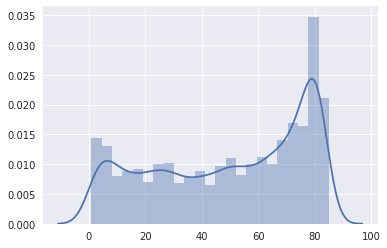

In [7]:
sns.distplot(df["G"].values, norm_hist=True)  # games played
plt.show()

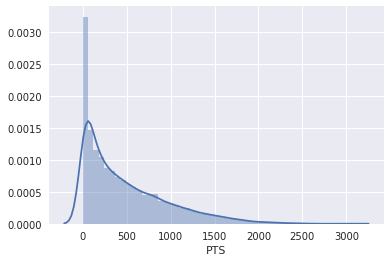

In [8]:
sns.distplot(df["PTS"], norm_hist=True)  # points

#### [Boxplots](https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots)

**Median**
The median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

**Inter-quartile range**
The middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

**Upper quartile**
Seventy-five percent of the scores fall below the upper quartile.

**Lower quartile**
Twenty-five percent of scores fall below the lower quartile.

**Whiskers**
The upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.

![](https://mathpullzone-8231.kxcdn.com/wp-content/uploads/boxplot-with-outliers.jpg)

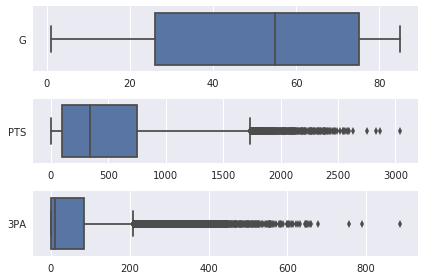

In [9]:
plt.subplot(3,1,1)
sns.boxplot(data=df[["G"]], orient="h")

plt.subplot(3,1,2)
sns.boxplot(data=df[["PTS"]], orient="h")

plt.subplot(3,1,3)
sns.boxplot(data=df[["3PA"]], orient="h")

plt.tight_layout()  # auto. positioning of subplots
plt.show()

We can also analyse how attributes relate to each other.

[]

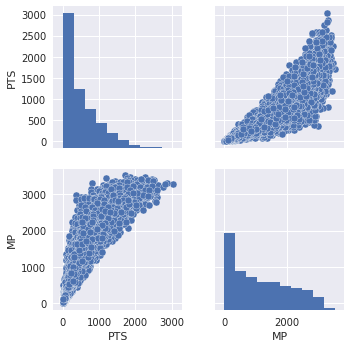

In [10]:
cols2plot = ["PTS", "MP"]

sns.pairplot(data=df, vars=cols2plot)
plt.plot()

[]

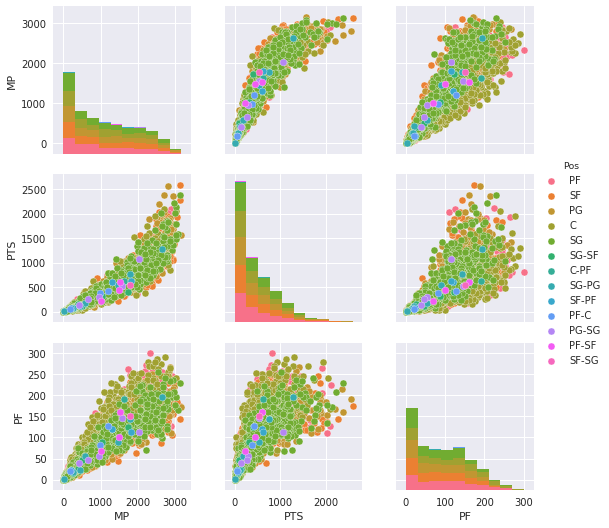

In [11]:
cols2plot = ["MP", "PTS", "PF"]

# applying a filter on year
sns.pairplot(data=df[df["Year"] > datetime(2012,1,1)], vars=cols2plot, hue="Pos")
plt.plot()

#### Extracting Some Insights

In [12]:
top5scorers = df.groupby(by="Player").sum()["PTS"].sort_values(ascending=False)[:5]
print(top5scorers)

Player
Karl Malone*         36928.0
Kobe Bryant          33643.0
Michael Jordan*      32292.0
Dirk Nowitzki        30260.0
Shaquille O'Neal*    29428.0
Name: PTS, dtype: float64


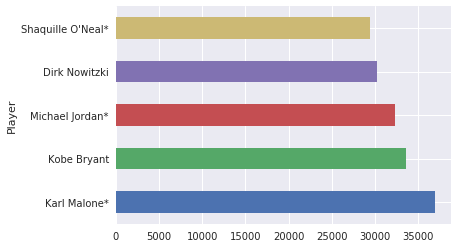

In [13]:
top5scorers.plot(kind="barh")  # does not match with the official list
                               # since we removed some of the veterans

#### How does age affect points made?

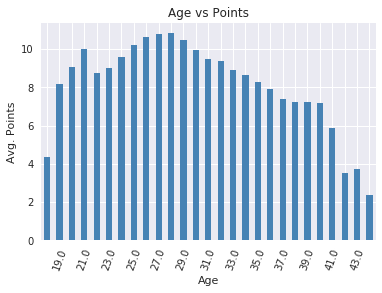

In [14]:
min_age = df["Age"].min()
max_age = df["Age"].max()

age_group = df.groupby(by="Age").sum()  # group by age and take sum of each column
pts_game = age_group["PTS"] / age_group["G"]  # find pts avg. at each age

ax = pts_game.plot(kind="bar",
                   color="steelblue",
                   rot=70)

for tick in ax.xaxis.get_major_ticks()[::2]:  # just to make it more readable
    tick.label1.set_visible(False)            # hiding some xticks

plt.ylabel("Avg. Points")
plt.title("Age vs Points")
plt.show()

#### Stephen Curry Shot Selection in Each Season

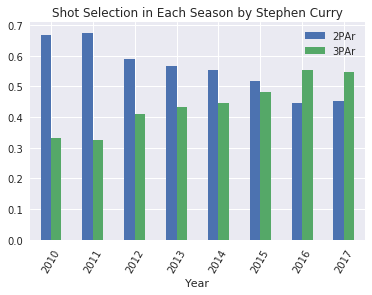

In [15]:
df["2PAr"] = 1 - df["3PAr"]  # adding the two point shot rate column

player = "Stephen Curry"
player_df = df[df["Player"] == player]

player_df.set_index(player_df["Year"].dt.strftime("%Y"), inplace=True)  # change index to display
                                                                        # years as xticks

player_df[["2PAr", "3PAr"]].plot.bar(rot=60)
plt.title("Shot Selection in Each Season by {}".format(player))
plt.show()

#### How did Golden State Warriors affect the league?

There is an ongoing debate regarding the shot selections in NBA. Teams strated to focus more on three points shots and changed their game plans accordingly. Some of the experts credit Golden State Warriors as the initiater team, beacuse of players like Curry and Thompson. You can learn more about the discussion from this [link.](https://www.pinnacle.com/en/betting-articles/Basketball/three-point-shots-nba/VPN2MLSADYW5FPZL)

Let's check if we can see such a phenomena in our dataset.

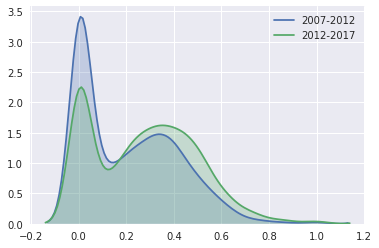

In [16]:
base_year = 1990
gw_year = 2012

# checking 3-point shot attemps 
past_df = df[(df["Year"] < datetime(2012, 1, 1)) & (df["Year"] >= datetime(2007, 1, 1))]
gs_df = df[df["Year"] > datetime(2012, 1, 1)]

ax = sns.kdeplot(past_df["3PAr"].rename("2007-2012"), shade=True)
sns.kdeplot(gs_df["3PAr"].rename("2012-2017"), ax=ax, shade=True)

plt.show()

The difference between two terms is visible. Now, let's apply a significance test to statistically approve this difference. 

In [17]:
# extracting values
past_values = past_df["3PAr"].values
gs_era = gs_df["3PAr"].values

In [18]:
# two-sided test for the null hypothesis that 2 independent samples 
# have identical average (expected) values
_, p_value = stats.ttest_ind(a=past_values, b=gs_era, equal_var=False)
p_value

6.465471390702545e-34

## What is hypothesis testing?

![](https://stepupanalytics.com/wp-content/uploads/2017/06/Hypothesis-Testing-Edited1.jpg)

In an analytical process, we would propose various claims regarding different aspects of the data. Visualization is an important tool to support these claims; however we need statistical tests to show that our claims are sound.

##### Structure of a hypothesis test

- **Null Hypothesis**  
- **Alternative Hypothesis**
- **Statictical Test**
    - Obtaining the test score and p-value
- **Interpreting the results**

In the example above, our null hypothesis $H_0$ is that the mean of 3-points shot attempts are equal in both time period.  
As the alternative hypothesis $H_a$, we proposed that they are different.

Depending on the data set, we need to choose an appropriate significance test. The results obtained from the test help us to determine whether we can reject the null hypothesis or not.

P-value shows how well the sample data support that the null hypothesis is true. Based on different significance levels, $\alpha$, we can reject or fail to reject the null hypothesis. 

If we set $\alpha$ as 0.05, then we can reject the null hypothesis in the example above and state that Golden State Warriors did affect the league.